In [124]:
import tslearn
import numpy as np

In [125]:
import pandas as pd

In [126]:
df_input = pd.read_csv('dataset.csv',header=None)
np_input = df_input.values
print(np_input[0][:].shape)

(409,)


In [127]:
from tslearn.utils import to_time_series_dataset
number_of_stations= np_input.shape[0]
number_of_timesteps =  (int)((np_input.shape[1]-1 )/2)
number_of_features = 2 # min max
X_train = np.zeros(( number_of_stations, number_of_timesteps,  number_of_features  ))
for i in range(number_of_stations):     #np_input.shape[0]):
    
    time_steps = (int)((np_input.shape[1]-1 )/2)
#     print(time_steps)
    ts = np.zeros(( time_steps , 2 ))
    for j in range(1,np_input.shape[1],2):
        [mi,ma] = [ np_input[i][j],np_input[i][j+1] ]
        ts[(int)((j-1)/2)] = [mi,ma]
#     print(ts.shape)
    X_train[i] = ts
    
print(X_train.shape)


(32, 204, 2)


In [128]:
from tslearn.clustering import TimeSeriesKMeans
km = TimeSeriesKMeans(n_clusters=5, metric="dtw",max_iter = 900,tol = 1e-08)
km.fit(X_train)

TimeSeriesKMeans(dtw_inertia=False, init='k-means++', max_iter=900,
                 max_iter_barycenter=100, metric='dtw', metric_params=None,
                 n_clusters=5, n_init=1, n_jobs=None, random_state=None,
                 tol=1e-08, verbose=0)

In [129]:
predictions = km.predict(X_train)

In [130]:

#To find distribution of clusters
for k in range(5):
    c_0 = np.argwhere(predictions==k)
    print(k,c_0)

0 [[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [19]
 [20]
 [21]
 [23]
 [24]
 [25]
 [27]
 [28]
 [30]
 [31]]
1 [[22]]
2 [[18]]
3 [[26]]
4 [[29]]


In [131]:
from scipy.spatial.distance import cdist 
distortions = [] 
inertias = [] 
mapping1 = {}   # Used for distortion calculation, didnt use
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
#     kmeanModel = KMeans(n_clusters=k).fit(X) 
    km = TimeSeriesKMeans(n_clusters=k, metric="dtw",max_iter = 900,tol = 1e-08)
    km.fit(X_train)     
      
    inertias.append(km.inertia_) 
    
  
    print(km.inertia_)
    mapping2[k] = km.inertia_ 

4032696.988128122
2364539.3715323247
2832107.905252138
1470561.9296149127
1318355.5180280688
1024617.5838356051
743585.7400254546
571189.895088685
492078.1044566415


In [132]:

for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 

1 : 4032696.988128122
2 : 2364539.3715323247
3 : 2832107.905252138
4 : 1470561.9296149127
5 : 1318355.5180280688
6 : 1024617.5838356051
7 : 743585.7400254546
8 : 571189.895088685
9 : 492078.1044566415


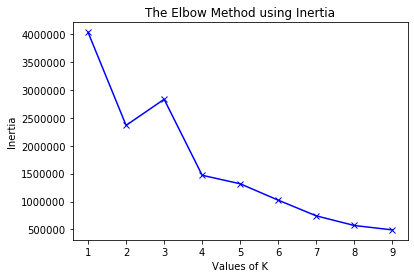

In [133]:
import matplotlib.pyplot as plt 
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [134]:
#-------------------------------------------------------------------------

{'Sonia Vihar, Delhi - DPCC': (28.710508, 77.24948499999999), 'Vivek Vihar, Delhi - DPCC': (28.672341999999997, 77.31526), 'Okhla Phase-2, Delhi - DPCC': (28.530784999999998, 77.27125500000001), 'NSIT Dwarka, Delhi - CPCB': (28.609090000000002, 77.03254129999999), 'Jawaharlal Nehru Stadium, Delhi - DPCC': (28.58028, 77.233829), 'Ashok Vihar, Delhi - DPCC': (28.695381, 77.181665), 'Anand Vihar, Delhi - DPCC': (28.646835, 77.31603199999999), 'Mundka, Delhi - DPCC': (28.684678, 77.076574), 'Narela, Delhi - DPCC': (28.822836, 77.10198100000001), 'Sri Aurobindo Marg, Delhi - DPCC': (28.531346000000003, 77.190156), 'Patparganj, Delhi - DPCC': (28.623748, 77.287205), 'Alipur, Delhi - DPCC': (28.815329, 77.15301), 'Mandir Marg, Delhi - DPCC': (28.636428999999996, 77.20106700000001), 'Nehru Nagar, Delhi - DPCC': (28.567890000000002, 77.25051500000001), 'Dr. Karni Singh Shooting Range, Delhi - DPCC': (28.498571000000002, 77.26484), 'Bawana, Delhi - DPCC': (28.7762, 77.051074), 'Pusa, Delhi - IMD